# Chapter 9. Plotting and Visualization

## 9.1 A Brief matplotlib API Primer

**Convention**

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
data=np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

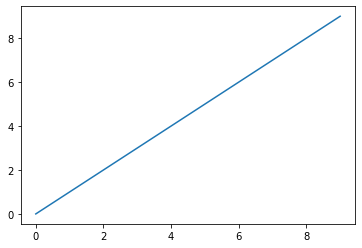

In [6]:
plt.plot(data)

### Figure and Subplots
* **Plots in matplotlib reside within a Figure object**<br>
* **Creating a new figure**<br>
* plt.figure() **has a number of options, notably,**<br>
* figsize **will guarantee the figure has a certain size and aspect ratio**<br>
* **In jupyter notebook plots are reset after each cell is evaluated**<br>
* **matplot draws on the last figure and subplot used(creating one if necessary)**
* **The objects returned by fig.add_subplot here are AxesSubplot objects, on which you can directly plot on the other empty subplots by calling each one's instance method**

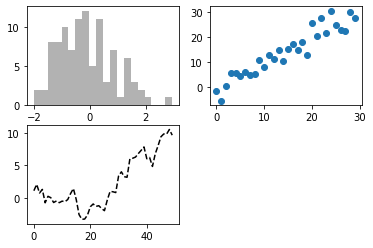

In [32]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)#figure should be 2*2, and we are selecting the 1st plot
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')#'--k' is a style option for matplotlib to plot a black dashed line
_=ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

**matplotlib includes a convenience method,** plt.subplots **,that creates a new figure and retunrs a NumPy array containing the created subplot objects**
* **The axes array be be easily indexed like two-dimensional array**
* **You can alsoe indicate tat subplots should have the same x- or y- axis using** sharex **and** sharey

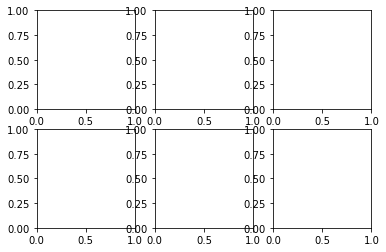

In [34]:
fig,axes=plt.subplots(2,3)

In [35]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd36ff43430>,
      dtype=object)

**Adjusting the spacing around subplots**<br>
**You can change the spacing using the** subplots_adjust **method on** Figure **objects, also availiable as a top-level function**<br>
wspace **and** hspace **controls the percent the figure width and figure height, respectively, to use as spacing betweeen subplots**

In [ ]:
subplots_adjust(left=None,bottom=None,rught=None,top=None,wspace=None,hspace=None)

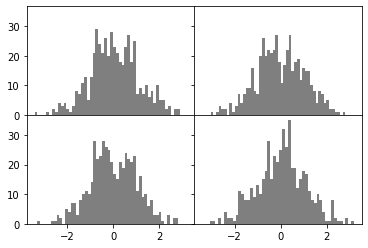

In [38]:
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

### Colors, Markers, and Line Styles

**Matplotlib's main** plot **function accepts arrays of x and y corordinates and optionally a string abbreviation indicating color and line style**<br>
**You can use any color on the spectrum by specifying its code**

In [ ]:
ax.plot(x,y,'g--')#plot x versus y with green dashes

In [ ]:
ax.plot(x,y,linestyle='--',color='g')

**Creating** *markers* **to highlight the actual data point**

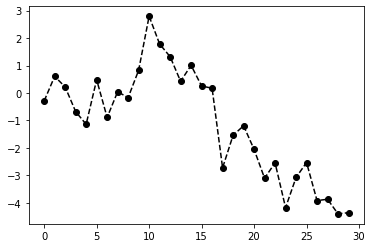

In [46]:
plt.plot(np.random.randn(30).cumsum(),'ko--')

**Could be written more explicitly as**

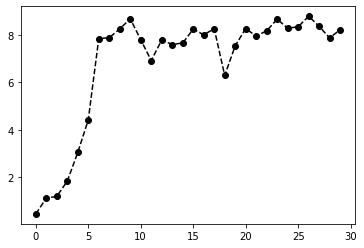

In [48]:
plt.plot(np.random.randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

**For line plots, subsequent points are linearly interpolated by default**<br>
**To alter, use the** drawstyle **option**

In [49]:
data=np.random.randn(30).cumsum()

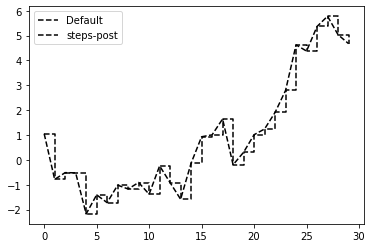

In [52]:
plt.plot(data,'k--',label='Default')
plt.plot(data,'k--',drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

pyplot **Interface control the plot range,tick locations, and tick labels, respectively. They can be used in two ways**<br>
* **Called with no arguments returns the current parameter value**
* **Called with parameters sets the parameter value**<br>
**All such methods act on the active most recently created** AxesSubplot<br>
**Each of them corresponds to two methods on the subplot object itsef:**
* **In the case of** xlim **these are** ax.get_xlim **and** ax.set_xlim

#### Setting the title, axis labels, ticks, and ticklabels
* **Change the x-axis ticks, use** set_xticks **and** set x_xticklabels

Text(0.5, 0, 'Stages')

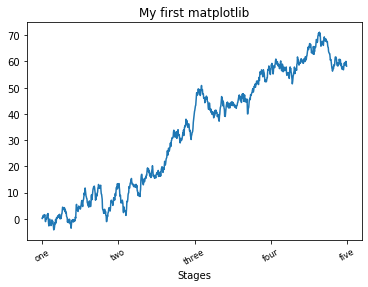

In [62]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000])#place the ticks along the data range, by default they will be labels
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
#rotation srts the x tick labels at a 30-degree rotation
ax.set_title('My first matplotlib')#set subplot title
ax.set_xlabel('Stages')

**Axes class has a set method that allows batch setting of plot properties**

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

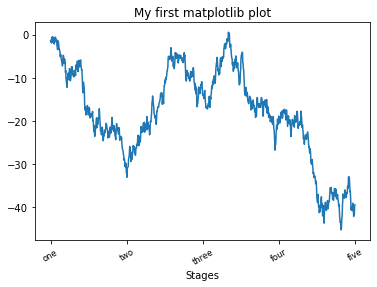

In [63]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks=ax.set_xticks([0,250,500,750,1000])#place the ticks along the data range, by default they will be labels
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
props={'title':'My first matplotlib plot','xlabel':'Stages'}
ax.set(**props)

### Adding legends

**Pass the** label **argument when adding each piece of the plot**<br>
**Call the** ax.legend()/plt.lenged() **to automatically create a legend**<br>
loc **tells matplotlib where to place the plot**

In [64]:
from numpy.random import randn

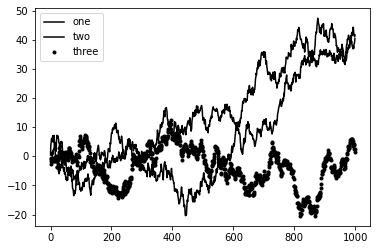

In [69]:
fig=plt.figure();ax=fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(),'k',label='two')
ax.plot(randn(1000).cumsum(),'k.',label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subject
* **Add anotations and text using the** text, arrow, **and** annotate **function**
* text **draws text at a given coordinates (x,y) on the plot with optional custom styling**
* **Annotations can draw both text and arrows arranged appropriate**
* ax.annotate **method can draw labels at the indicated x and y coordinate**

In [ ]:
ax.text(x,y,'Hello World!',family='moonspace',fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

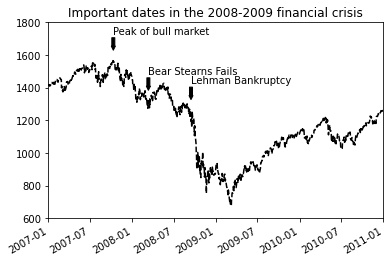

In [80]:
from datetime import datetime

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

data=pd.read_csv('examples/spx.csv',index_col=0,parse_dates=True)
spx=data['SPX']

spx.plot(ax=ax,style='k--')

crisis_data=[
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,14),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label,xy=(date,spx.asof(date)+75),#.asof() is used to get the last rows before where
               xytext=(date,spx.asof(date)+225),
               arrowprops=dict(facecolor='black',headwidth=4,width=3,
                              headlength=4),
               horizontalalignment='left',verticalalignment='top')
    
#Zoom in on 2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])#manually set the start and end boundaries for the plot 
ax.set_ylim([600,1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

**Drawing shapes**
* **matplotlib has objects that represent many shapes, referred to as *patches***
* **To add a shape to a plot, you create the patch object shp and add it to a subplot by calling** ax.add_patch(shp)

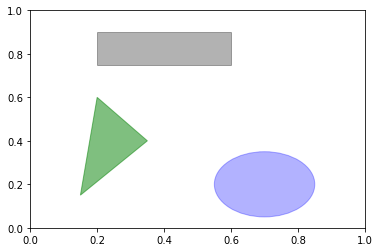

In [5]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

rect=plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots on File
* **You can save the active figure to file using** plt.savefig
* **Or call the figure object's** savefig **instsance method**
* **The file type is inferred from the file extension**
* dpi **controls the dots-per-inch resolution**
* bbox_inches **can trim the white space around the actual figure**
* savefig **can also write to any file-like object**

In [ ]:
plt.savefig('figpath.svh')

In [ ]:
plt.savefig('figpath.png',dpi=400,bbox_inches='tight')#get a plot as PNG with minimal whitespace and 400 DPI

### matplotlib configuration
rc **method:** <br>
* **First argument to** rc **is the compoenet you wish to customize**
* **Follow with a sequence of key worf arguments indicating the new parameters**

In [ ]:
font_options={'family':'moonspace','weight':'bold','size':'small'}
plt.rc('font',**font_options)

## 9.2 Plotting with pandas and seaborn
**Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics**

### Line Plots
**Series and DataFrame each have a** plot **attribute for making some basic plot types**

In [6]:
s=pd.Series(np.random.rand(10).cumsum(),index=np.arange(0,100,10))

**The Series object's** index **is passed to matplotlib for plotting on the x-axis, can be disabled by** use_index=False

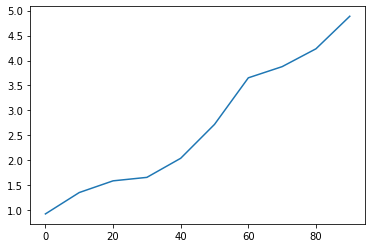

In [7]:
s.plot()

* **Most of panda's plotting methods accept an optional** ax **parameter, which can be a matplotlib subplot object**
* **DataFrame's** plot **method plots each of its columns as a different line on the same subplot, creating a legend automatically**
* **Additional keyword arguments to** plot **are passed through the respective matplotlib plotting function**

In [9]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=['A','B','C','D'],index=np.arange(0,100,10))

In [10]:
df

,A,B,C,D
0,0.202331,-1.633524,0.668334,0.985187
10,-1.318953,-2.064255,1.455974,-0.474055
20,-1.420080,0.207298,0.179895,0.049765
30,-0.861405,0.160160,-0.760764,0.570930
40,-1.143015,0.826989,0.108351,2.350946
50,-2.319669,-0.451121,-0.818138,1.652550
60,-1.270018,-0.320435,1.330053,0.872001
70,-1.623428,1.119894,1.667281,1.269682
80,-3.000250,-0.046167,2.734581,1.343369
90,-2.143675,-1.155672,2.011387,-0.231015


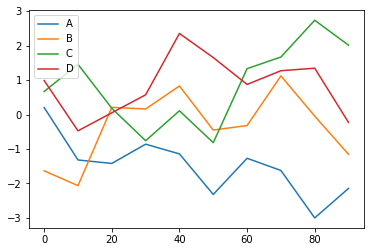

In [11]:
df.plot()

### Bar Plots

plot.bar() **and** plot.barh() **make vertical and horizontal bar plots**
* **The Series of DataFrame index will be used as the** x(bar) **or** y(bar) **ticks**

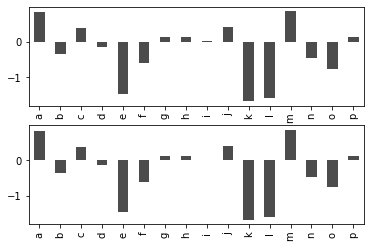

In [14]:
fig,axes=plt.subplots(2,1)
data=pd.Series(np.random.randn(16),index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)#color='k' sets the plot to black, alpha sets the transparency
data.plot.bar(ax=axes[1],color='k',alpha=0.7)

**With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value**

In [24]:
df=pd.DataFrame(np.random.randn(6,4),
                index=['one','two','three','four','five','six'],
               columns=pd.Index(['A','B','C','D'],name='Genus'))

In [20]:
df

Genus,A,B,C,D
one,0.778602,-0.449424,0.702290,0.803349
two,1.205017,1.441079,-0.886059,-0.064685
three,1.388083,-0.931574,0.157253,-1.080177
four,-0.039351,1.696280,-0.189240,-0.201741
five,0.222179,0.608406,-0.312073,-0.600216
six,-1.161956,0.065189,-1.786009,1.906719


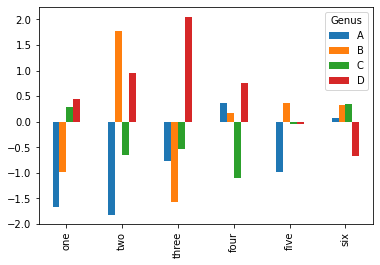

In [25]:
df.plot.bar()#The name "Genus" on the DataFrame's columns is used to title the legend

**We can create a stacked bar plots from a DataFramme by passig** stacked=True

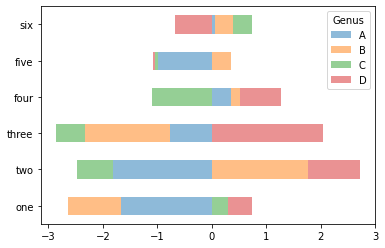

In [26]:
df.plot.barh(stacked=True,alpha=0.5)

**Restaurant Tipping Example**<br>
**Create a stacked bar plot showing the percentage of data points for each party size on each day**

In [43]:
tips=pd.read_csv('examples/tips.csv')

In [44]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [45]:
party_counts=pd.crosstab(tips['day'],tips['size'])#Compute a simple cross tabulation of two (or more) factors. 
#By default computes a frequency table of the factors unless an array of values and an 
#aggregation function are passed.

In [46]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [47]:
#Not many 1- and 6- person parties
party_counts=party_counts.loc[:,2:5]

**Normalize so that each row sums to 1 and make the plot**

In [50]:
party_pcts=party_counts.div(party_counts.sum(1),axis=0)#Normalize to sum to 1

In [49]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


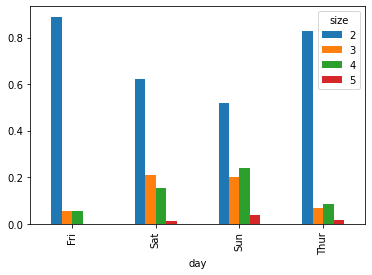

In [51]:
party_pcts.plot.bar()

**With data that acquires aggregation or summarization before making a plot, using** seaborn **package can make things much simpler**

In [53]:
import seaborn as sns
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])

In [54]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


**Plotting functions in seaborn**
* **Plotting function takes a** data **argument, which can be a pandas DataFrame**
* **the other arguments refer to column names**
* **The black lines drawn on the bars represent the 95% confidence interval**

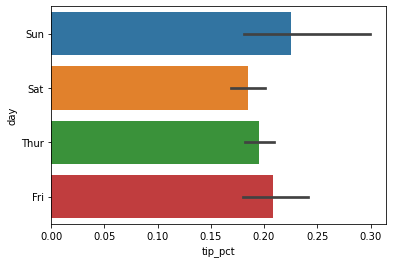

In [55]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

sns.barplot **has a** hue **option that enables us to split the dataa by an additional categorical value**

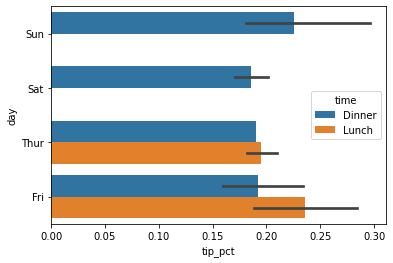

In [56]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

seaborn **automatically changed the aesthetics of plots, the default color palette, plot background, and grid colors**<br>
**Switch between different plot appearances usinhg** seaborn.set

In [57]:
sns.set(style="whitegrid")

### Histogram and Density Plots
* **A histogram is a kind of bar plot that gives a discretized display of value frequency**
* **Points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted**

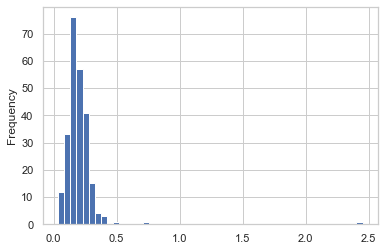

In [58]:
tips['tip_pct'].plot.hist(bins=50)

***density plot*:fomed by computing an estimate of a continuous probability distribution that might have generated the observed data**<br>
**Usual procedure is to approximate the distribution as a mixture of "kernels"-simpler distributions**

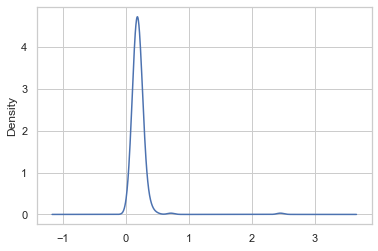

In [59]:
tips['tip_pct'].plot.density()

**Plotting density and histogram plots in seaborn**<br>
distplot: **Plot both a histogram and a continuous density estimate simultanesouly**<br>
**Example: a binomial distribution drawing from two different standard normal distributions**

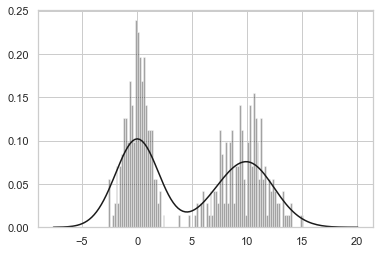

In [62]:
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')

### Scatter or Point Plots

**Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series**

In [74]:
macro=pd.read_csv('examples/macrodata.csv')
data=macro[['cpi','m1','tbilrate','unemp']]
trans_data=np.log((data)).diff().dropna()#compute the log difference

regplot **makes a scatter plot and fits a linear regression line**

Text(0.5, 1.0, 'CHang in log m1 versus log unemp')

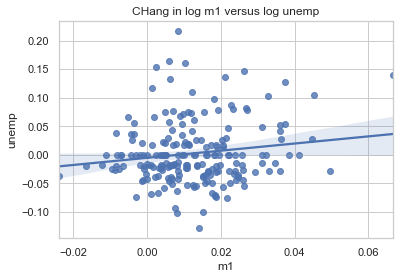

In [76]:
sns.regplot('m1','unemp',data=trans_data)
plt.title('CHang in log %s versus log %s' % ('m1','unemp'))

***pairs* plot or *scatter plot matrix*: All scatter plots among a group of variables**<br>
pairplot **:placing histograms or density estimates of each variable along the diagonal**

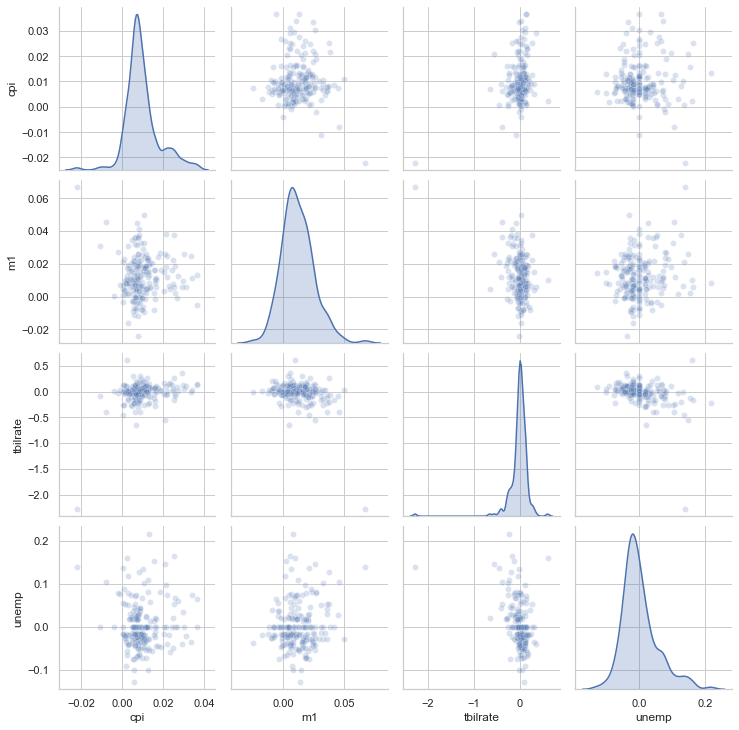

In [77]:
sns.pairplot(trans_data,diag_kind='kde',plot_kws={'alpha':0.2})#plot_kws: enables passing down configuration option
#to the individual calls on the off-diagonal elements

## Facet Grids and Categorical Data

**One way to visualize the data with many categorical variables is to use a** facetgrid<br>
**Seaborn has a built-in function** catplot **that simplifies making many kinds of faceted plots**

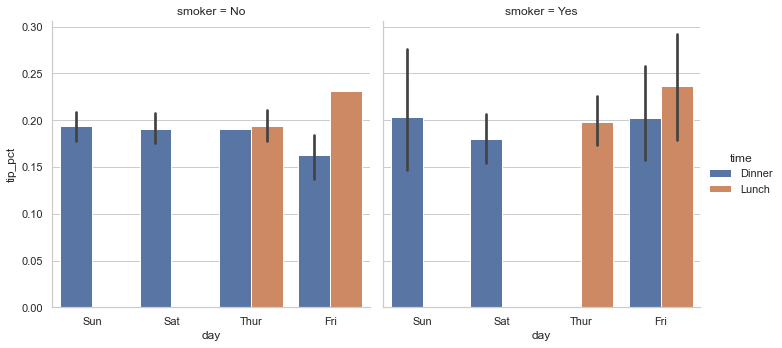

In [80]:
sns.catplot(x='day',y='tip_pct',hue='time',col='smoker',
              kind='bar',data=tips[tips.tip_pct<1])

**Instead of grouping by 'time' by different bar colors within facem we can also expand the facet grid by adding one row per** time **value**

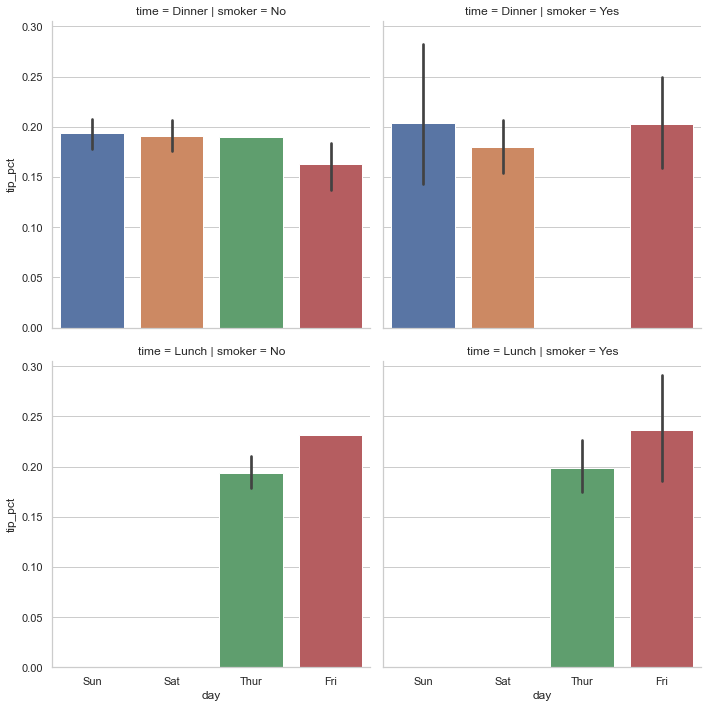

In [81]:
sns.catplot(x='day',y='tip_pct',row='time',col='smoker',kind='bar',data=tips[tips.tip_pct<1])

catrplot **supports other plot type**

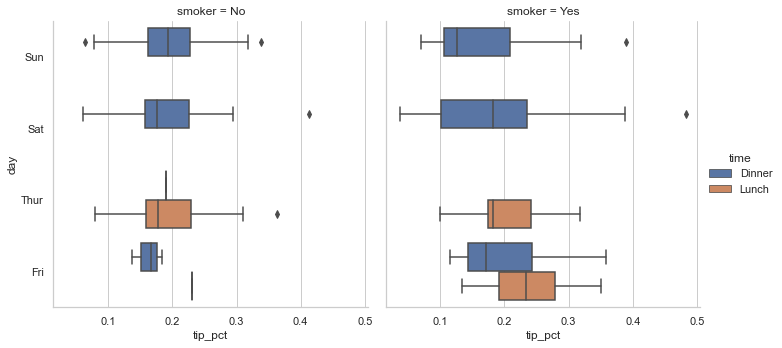

In [82]:
sns.catplot(x='tip_pct',y='day',hue='time',col='smoker',
              kind='box',data=tips[tips.tip_pct<0.5])

In [83]:
%%bash
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    .ipynb_checkpoints/Untitled-checkpoint.ipynb
	deleted:    .ipynb_checkpoints/Untitled1-checkpoint.ipynb
	modified:   Data_Loading_Practice.ipynb
	modified:   NumPy_Basics_Arrays_and_Vectorized_Computation.ipynb
	deleted:    Untitled.ipynb
	deleted:    Untitled1.ipynb
	modified:   data_cleaning.ipynb
	modified:   datawrangling.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/Data_Loading_Practice-checkpoint.ipynb
	.ipynb_checkpoints/NumPy_Basics_Arrays_and_Vectorized_Computation-checkpoint.ipynb
	.ipynb_checkpoints/TimeSeries (1column)-checkpoint.ipynb
	.ipynb_checkpoints/data_cleaning-checkpoint.ipynb
	.ipynb_checkpoints/datawrangling-checkpoint.ipynb
	.ipynb_checkpoints/plo

In [86]:
%%bash
git add plotting_and_visulization-checkpoint.ipynb

fatal: pathspec 'plotting_and_visulization-checkpoint.ipynb' did not match any files


CalledProcessError: Command 'b'git add plotting_and_visulization-checkpoint.ipynb\n'' returned non-zero exit status 128.